In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [ ]:
dataset_1=pd.read_csv("Telecom Customer Churn.csv")

In [ ]:
dataset_1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:

dataset = dataset_1.drop(columns=['customerID'])


In [ ]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.shape

(7043, 20)

In [ ]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
dataset['TotalCharges'].ffill(inplace=True)
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dataset.describe()
categorical_column=dataset.describe(include='object')

In [ ]:
categorical_column.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
dataset.duplicated().sum()

22

In [ ]:
#getting numeric columns
num_data=numeric=[columns for columns in dataset.columns if ((dataset[columns].dtype)!='0')&(len(dataset[columns].unique())>=2)]
num_data

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

## Data Visualization for Numeric Columns or Features

In [ ]:
# Getting numeric columns with more than or equal 2 unique values
numeric_columns = dataset.select_dtypes(include=['number']).columns
numeric_data = [column for column in numeric_columns if len(dataset[column].unique()) >= 2]
numeric_data

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# Convert TotalCharges to numeric, coercing errors to NaN
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
numeric_data = dataset.select_dtypes(include =[np.number])
numeric_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65



### Univariate Analysis

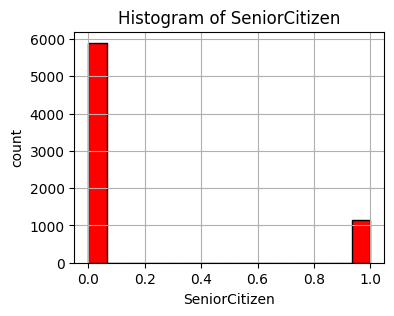

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(dataset['SeniorCitizen'], bins=15, color='red', edgecolor='black')
plt.title('Histogram of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('count')
plt.grid(True)
plt.show()


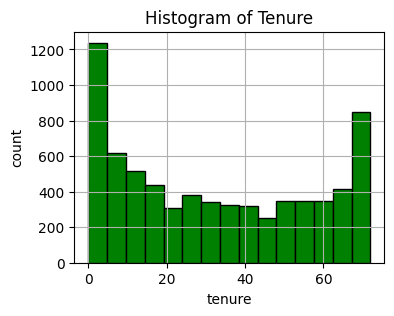

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(dataset['tenure'], bins=15, color='green', edgecolor='black')
plt.title('Histogram of Tenure')
plt.xlabel('tenure')
plt.ylabel('count')
plt.grid(True)
plt.show()


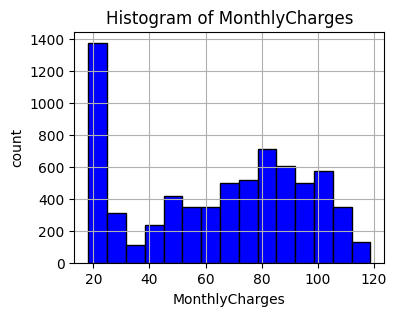

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(dataset['MonthlyCharges'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('count')
plt.grid(True)
plt.show()


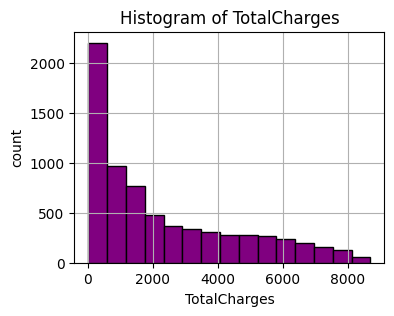

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(dataset['TotalCharges'], bins=15, color='purple', edgecolor='black')
plt.title('Histogram of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('count')
plt.grid(True)
plt.show()


### Bivariate Analysis

In [ ]:
#  'Churn' is the target column
target="Churn"

# Select numeric columns with at least 2 unique values
numeric_columns = dataset.select_dtypes(include=['number']).columns
numeric_data = [column for column in numeric_columns if len(dataset[column].unique()) >= 2]

# Create box plots for each numeric column split by Churn
for column in numeric_data:
    fig = px.box(dataset, x='Churn', y=column, color='Churn',
                 labels={'Churn': 'Churn', column: column},
                 title=f'Box plot of {column} split by Churn')
    fig.show()


### Interpretation
* **SeniorCitizen:**

 From the box plot we discussed earlier, it is clear that senior citizens are more likely to churn compared to non-senior citizens. There is a significant distinction between the churn behavior of senior and non-senior citizens.

* **Tenure:**

 Customers with shorter tenure are more likely to churn. Customers with longer tenure tend to stay with the company, indicating loyalty or satisfaction with the service.

* **MonthlyCharges:**
  
 Higher monthly charges might be associated with a higher churn rate. Customers paying more might be less satisfied, potentially due to the cost of the service.

* **TotalCharges:**
  
 Similar to monthly charges, higher total charges might also indicate a higher likelihood of churn. However, this feature needs to be analyzed in conjunction with tenure to understand its impact fully.

## Data Visualization for Categorical Columns or Features

In [ ]:
# Select categorical columns (both object and category types)
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

# Convert the selected columns to a list if needed
categorical_features = list(categorical_columns)

# Remove 'CustomerID' from the list if it exists
if 'CustomerID' in categorical_features:
    categorical_features.drop('CustomerID')

# Display the categorical features
print("Categorical features:", categorical_features)


Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


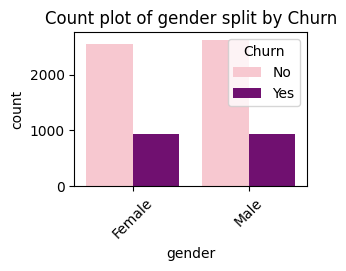

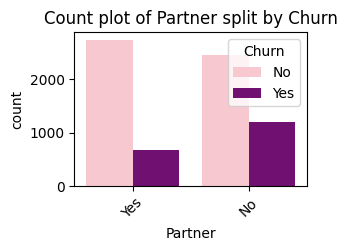

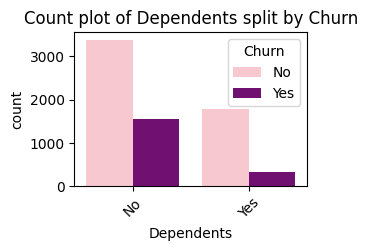

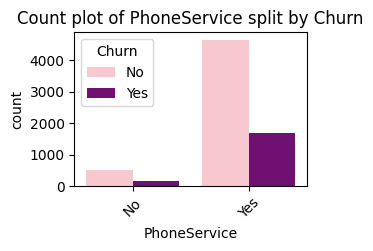

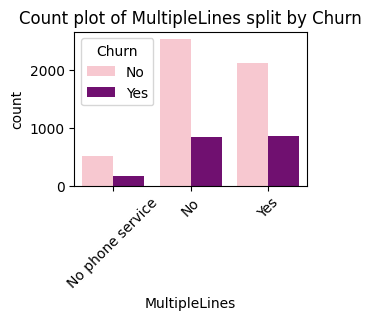

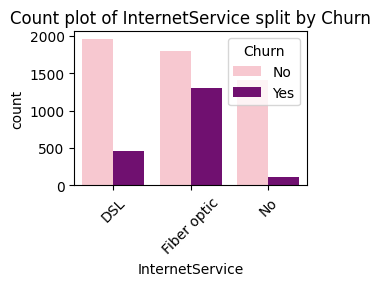

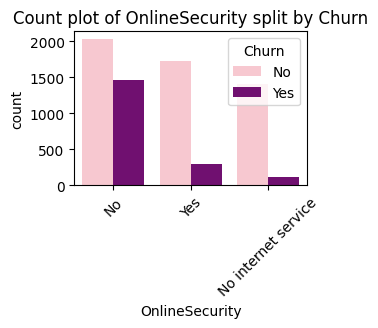

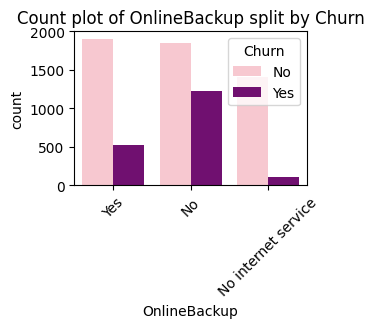

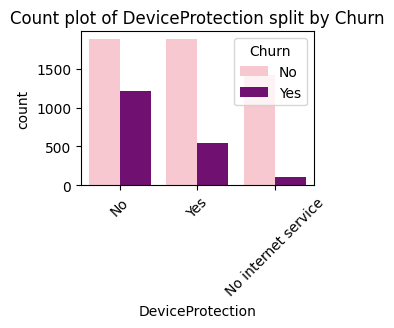

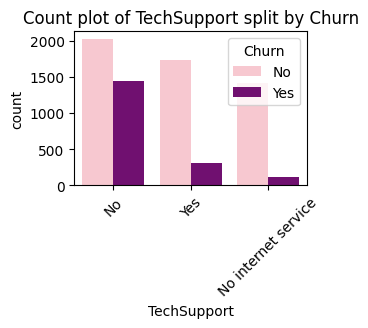

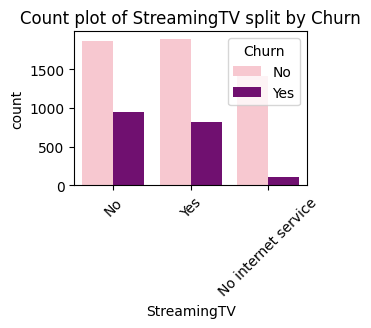

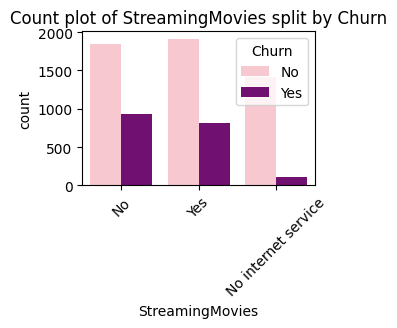

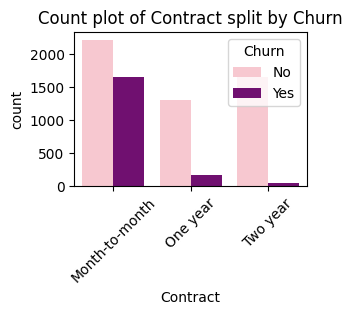

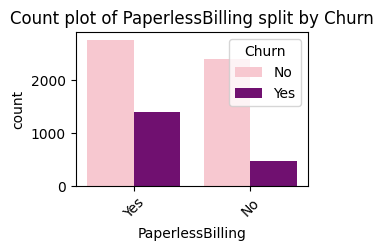

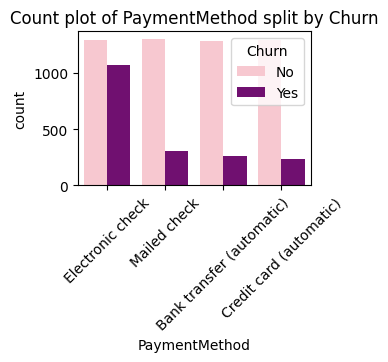

In [ ]:
# Convert the selected columns to a list and exclude 'Churn'
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Define the colors to use in the plots
colors = ["pink", "purple"]

# Create bar plots for each categorical column split by Churn
for i, column in enumerate(categorical_features):
    plt.figure(figsize=(3,2))
    sns.countplot(data=dataset, x=column, hue='Churn', palette=colors)
    plt.title(f'Count plot of {column} split by Churn')
    plt.xticks(rotation=45)
    plt.show()


### Interpretation
* **Gender:** Refers to the customer's gender; can reveal if there's a gender-based trend in churn rates.
  
* **Partner:** Indicates whether the customer has a partner; may show if having a partner influences the likelihood of churn.

* **Dependents:** Specifies if the customer has dependents; could impact churn based on the need for family-oriented services.
* **PhoneService:** Denotes if the customer has phone service; may correlate with churn if the service is deemed essential.

* **MultipleLines:** Shows if the customer has multiple lines; could affect churn if bundled services are valued.

* **InternetService:** Represents the type of internet service; might indicate churn patterns based on the type or quality of internet service.

* **OnlineSecurity:** Indicates if the customer has online security; could affect churn if perceived as a necessary feature.

* **OnlineBackup:** Shows if the customer uses online backup; may influence churn based on the perceived value of data security.

* **DeviceProtection:** Denotes if the customer has device protection; could impact churn if device protection is seen as important.

* **TechSupport:** Represents if the customer has tech support; might influence churn if the support is a critical factor.

* **StreamingTV:** Indicates if the customer subscribes to streaming TV; could affect churn based on the popularity of this service.

* **StreamingMovies:** Shows if the customer subscribes to streaming movies; may impact churn depending on the value of movie streaming.

* **Contract:** Specifies the type of contract (e.g., month-to-month, one year, two years); can reveal if contract length influences churn.

* **PaperlessBilling:** Indicates if the customer uses paperless billing; might impact churn if paperless options are preferred.

* **PaymentMethod:** Represents the payment method used (e.g., electronic check, mailed check, credit card); could show if certain payment methods are associated with higher churn rates.







### Outliers

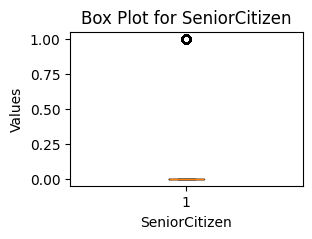

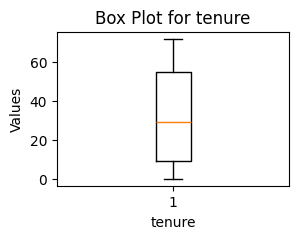

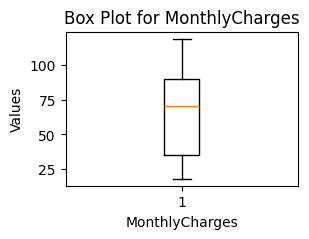

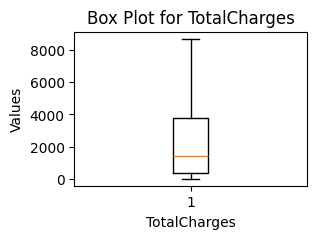

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'numeric_data' contains your numeric columns
for column in numeric_data:
    plt.figure(figsize=(3,2))
    plt.boxplot(dataset[column].dropna())
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


### Here Senior citizen is a binary variable. so there is no need for outlier removal

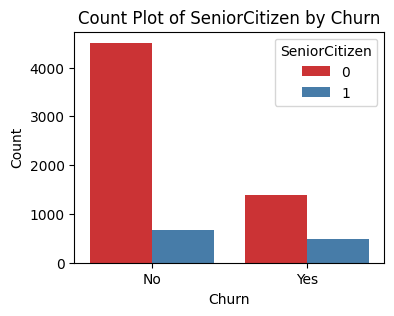

In [ ]:
# Count plot of SeniorCitizen by Churn for better understanding

plt.figure(figsize=(4,3))
sns.countplot(x='Churn', hue='SeniorCitizen', data=dataset, palette='Set1')
plt.title('Count Plot of SeniorCitizen by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


### Label Encoding

In [ ]:
# Define the categorical features to be label encoded
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn'
]

# Initialize a dictionary to store the LabelEncoder objects
label_encoders = {}

# Apply label encoding to the categorical features and save the encoders
for column in categorical_features:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Feature Selection for Categorical and Numerical Features Using Chi-Square Statistics

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency
import pandas as pd

def feature_relevance_test(dataset, feature, target):
    if dataset[feature].dtype == 'object':
        contingency_table = pd.crosstab(dataset[feature], data[target])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        if p_val < 0.05:
            print(f"{feature} is relevant (p-value: {p_val:.4f})")
    else:
        t_stat, p_val = ttest_ind(dataset[feature][dataset[target] == 0], dataset[feature][dataset[target] == 1])
        if p_val < 0.05:
            print(f"{feature} is relevant (p-value: {p_val:.4f})")

data = dataset
target = 'Churn'
for feature in data.columns:
    if feature != target:
        feature_relevance_test(dataset, feature, target)


SeniorCitizen is relevant (p-value: 0.0000)
Partner is relevant (p-value: 0.0000)
Dependents is relevant (p-value: 0.0000)
tenure is relevant (p-value: 0.0000)
MultipleLines is relevant (p-value: 0.0014)
InternetService is relevant (p-value: 0.0001)
OnlineSecurity is relevant (p-value: 0.0000)
OnlineBackup is relevant (p-value: 0.0000)
DeviceProtection is relevant (p-value: 0.0000)
TechSupport is relevant (p-value: 0.0000)
StreamingTV is relevant (p-value: 0.0021)
StreamingMovies is relevant (p-value: 0.0012)
Contract is relevant (p-value: 0.0000)
PaperlessBilling is relevant (p-value: 0.0000)
PaymentMethod is relevant (p-value: 0.0000)
MonthlyCharges is relevant (p-value: 0.0000)
TotalCharges is relevant (p-value: 0.0000)


Chi_scores and p values of the variables, higher the Chi_scores values higher will the importance and lower the p-values (<=0.05) higher will be the importance.

 Higher Chi-Square values indicate a stronger association between the feature and the target variable.

 Contract, OnlineSecurity, TechSupport, and OnlineBackup are the most influential features in predicting churn. Features like DeviceProtection, Dependents, PaperlessBilling, and Partner also have a notable impact.Gender and PhoneService have minimal to no impact on predicting churn.

 lower p-values indicate a stronger statistical significance of the relationship between the feature and the target variable.

# Model Bulding and Training and Evaluvation

## Selected Features

1. Contract
  
2. Online Security
  
3. Tech support

4. Tenure

5. Online Backups

6. Devive protection

7. Dependents

8. Paperless billing

9. Partner
  
10. Total charger
  
11. Monthly charges
  
12. Payment method
  
13. Internet Service
  
14. Multiple Lines

15. Streming Movies

16. SeniorCitizen
  

* **FS 1 :**
  
1. Contract
  
2. Online Security
  
3. SeniorCitizen
  
4. Tenure
  
5. Online Backups
  
6. Monthly charges
  

* **FS 2 :**
  
1. Contract
  
2. Online Security
  
3. Tech support
  
4. Tenure
  
5. Online Backups
  
6. Multiple Lines
  
7. Dependents
  
8. Paperless billing
  
9. Partner
  
10. Total charges
  
11. Monthly charges
  
12. Streaming Movies


* **FS 3 :**

1. Paperless billing

2. Total charges

3. Payment method

4. Internet Service

5. Device protection

In [ ]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Define features and target
target= 'Churn'
X = dataset[['Contract', 'OnlineSecurity', 'SeniorCitizen', 'tenure', 'OnlineBackup', 'MonthlyCharges']]
y = dataset[target]

# Convert categorical features to numerical if needed (using one-hot encoding or similar methods)
X = pd.get_dummies(X, drop_first=True)  # This will convert categorical variables into dummy/indicator variables

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Predict probabilities and classes
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = model.predict(X_test)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


ROC AUC: 0.8443
Accuracy: 0.7946
F1 Score: 0.5786
Recall: 0.5192
Confusion Matrix:
 [[1381  158]
 [ 276  298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.52      0.58       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [ ]:
# Define features and target
target= 'Churn'
X = dataset[['Contract', 'OnlineSecurity', 'TechSupport',
         'OnlineBackup', 'MultipleLines', 'Dependents',
            'PaperlessBilling', 'Partner', 'StreamingMovies']]
y = dataset[target]

# Convert categorical features to numerical if needed (using one-hot encoding or similar methods)
X = pd.get_dummies(X, drop_first=True)  # This will convert categorical variables into dummy/indicator variables

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Predict probabilities and classes
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = model.predict(X_test)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


ROC AUC: 0.8209
Accuracy: 0.7643
F1 Score: 0.5108
Recall: 0.4530
Confusion Matrix:
 [[1355  184]
 [ 314  260]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1539
           1       0.59      0.45      0.51       574

    accuracy                           0.76      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



In [ ]:
# Define features and target
target= 'Churn'
X = dataset[['PaperlessBilling',
    'TotalCharges',
    'PaymentMethod',
    'InternetService',
    'DeviceProtection']]
y = dataset[target]

# Convert categorical features to numerical if needed (using one-hot encoding or similar methods)
X = pd.get_dummies(X, drop_first=True)  # This will convert categorical variables into dummy/indicator variables

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Predict probabilities and classes
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = model.predict(X_test)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


ROC AUC: 0.7211
Accuracy: 0.7444
F1 Score: 0.2781
Recall: 0.1812
Confusion Matrix:
 [[1469   70]
 [ 470  104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84      1539
           1       0.60      0.18      0.28       574

    accuracy                           0.74      2113
   macro avg       0.68      0.57      0.56      2113
weighted avg       0.71      0.74      0.69      2113



In [ ]:
X = dataset[['Contract', 'OnlineSecurity', 'SeniorCitizen', 'tenure', 'OnlineBackup', 'MonthlyCharges']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm1 = SVC(random_state=42)
svm1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7991483321504613
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.71      0.41      0.52       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

Confusion Matrix:
[[972  64]
 [219 154]]


In [ ]:
X = dataset[['Contract', 'OnlineSecurity', 'TechSupport',
         'OnlineBackup', 'MultipleLines', 'Dependents',
            'PaperlessBilling', 'Partner', 'StreamingMovies']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm1 = SVC(random_state=42)
svm1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7814052519517388
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
[[922 114]
 [194 179]]


In [ ]:
X = dataset[['PaperlessBilling',
    'TotalCharges',
    'PaymentMethod',
    'InternetService',
    'DeviceProtection']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm1 = SVC(random_state=42)
svm1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7352732434350603
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

Confusion Matrix:
[[1036    0]
 [ 373    0]]


In [ ]:
# Load your dataset
df = dataset

X = dataset[['Contract', 'OnlineSecurity', 'SeniorCitizen', 'tenure', 'OnlineBackup', 'MonthlyCharges']]

y = dataset["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7735982966643009
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409

Confusion Matrix:
[[901 135]
 [184 189]]


In [ ]:
# Load your dataset
df = dataset

X = dataset[['Contract', 'OnlineSecurity', 'TechSupport',
         'OnlineBackup', 'MultipleLines', 'Dependents',
            'PaperlessBilling', 'Partner', 'StreamingMovies']]

y = dataset["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7636621717530163
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.56      0.52      0.54       373

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409

Confusion Matrix:
[[881 155]
 [178 195]]


In [ ]:
# Load your dataset
df = dataset

X = dataset[['PaperlessBilling',
    'TotalCharges',
    'PaymentMethod',
    'InternetService',
    'DeviceProtection']]

y = dataset["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7537260468417317
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1036
           1       0.53      0.54      0.54       373

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409

Confusion Matrix:
[[861 175]
 [172 201]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = dataset[['Contract', 'OnlineSecurity', 'SeniorCitizen', 'tenure', 'OnlineBackup', 'MonthlyCharges']]

y = dataset["Churn"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7224982256919801
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409

Confusion Matrix:
[[834 202]
 [189 184]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = dataset[['Contract', 'OnlineSecurity', 'TechSupport',
         'OnlineBackup', 'MultipleLines', 'Dependents',
            'PaperlessBilling', 'Partner', 'StreamingMovies']]

y = dataset["Churn"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.765791341376863
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1036
           1       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Confusion Matrix:
[[893 143]
 [187 186]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = dataset[['PaperlessBilling',
    'TotalCharges',
    'PaymentMethod',
    'InternetService',
    'DeviceProtection']]

y = dataset["Churn"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7395315826827538
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1036
           1       0.51      0.52      0.51       373

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

Confusion Matrix:
[[849 187]
 [180 193]]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset[['Contract', 'OnlineSecurity', 'SeniorCitizen', 'tenure', 'OnlineBackup', 'MonthlyCharges']]
y = dataset["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xg1 = xgb.XGBClassifier(random_state=42)
xg1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78708303761533
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[915 121]
 [179 194]]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset[['Contract', 'OnlineSecurity', 'TechSupport',
         'OnlineBackup', 'MultipleLines', 'Dependents',
            'PaperlessBilling', 'Partner', 'StreamingMovies']]
y = dataset["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xg1 = xgb.XGBClassifier(random_state=42)
xg1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7700496806245565
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.57      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.77      1409

Confusion Matrix:
[[896 140]
 [184 189]]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset[['PaperlessBilling',
    'TotalCharges',
    'PaymentMethod',
    'InternetService',
    'DeviceProtection']]
y = dataset["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xg1 = xgb.XGBClassifier(random_state=42)
xg1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7920511000709723
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.54      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Confusion Matrix:
[[916 120]
 [173 200]]


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
# Split data into features and target

X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model3 = LogisticRegression()
model3.fit(X_train, y_train)

# Save the model
joblib.dump(model3, 'customer_churn_model.pkl')

# Load the trained model
model = joblib.load('customer_churn_model.pkl')

# Define the app title
def app_title():
    st.title("Customer Churn Prediction")

# Define the user input features
def user_input_features():
    # Get user input
    SeniorCitizen = st.selectbox('SeniorCitizen',('Yes','No'))
    tenure = st.number_input('Tenure (in months)', min_value=0, value=0)
    OnlineSecurity = st.selectbox('OnlineSecurity', ('Yes', 'No', 'No internet service'))
    OnlineBackup = st.selectbox('OnlineBackup', ('Yes', 'No', 'No internet service'))
    Contract = st.selectbox('Contract', ('One year', 'Two year', 'Month-to-month'))
    MonthlyCharges = st.number_input('MonthlyCharges', min_value=0.0, value=0.0)
    # Create a dictionary to store the user input
    user_input = {
    "SeniorCitizen": 1 if SeniorCitizen == 'Yes' else 0,
    "tenure": tenure,
    "OnlineSecurity": 2 if OnlineSecurity == 'Yes' else (0 if OnlineSecurity == 'No' else 1),
    "OnlineBackup": 2 if OnlineBackup == 'Yes' else (0 if OnlineBackup == 'No' else 1),
    "Contract": 1 if Contract == 'One year' else (2 if Contract == 'Two year' else 0),
    "MonthlyCharges": MonthlyCharges
}

    features = pd.DataFrame(data, index=[0])

    # Encode categorical features
    label_encoder = LabelEncoder()
    for column in features.columns:
        if features[column].dtype == 'object':
            features[column] = label_encoder.fit_transform(features[column])

    return features


# Define the predict churn function
def predict_churn(model, features):
    prediction = model.predict(features)
    return prediction[0]

# Define the display prediction function
def display_prediction(prediction):
    if prediction == 1:
        st.success('This customer is likely to churn.')
    else:
        st.success('This customer is likely to stay.')

def main():
    app_title()
    st.subheader("Enter Customer Information")
    user_features = user_input_features()
    if st.button("Predict"):
        prediction = predict_churn(model, user_features)
        display_prediction(prediction)

main()

Overwriting app.py


In [ ]:
!streamlit run app.py


^C
